In [1]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras import layers, models
import keras.backend as K
import keras
from keras.models import Sequential
from keras.layers import Conv1D, Convolution1D, MaxPooling1D, ZeroPadding1D, BatchNormalization, Activation
from keras.utils import to_categorical 
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
import timeit
from keras.optimizers import SGD
import warnings
warnings.filterwarnings('ignore')
import sys
from keras.regularizers import l2
import kerastuner as kt

In [3]:
csvFile = pd.read_csv("C:/Users/Dell/Downloads/SY_NG/Data/Myfile_dataA_5000.csv")

In [5]:
csvFile.shape

(5328, 9)

In [7]:
csvFile = csvFile.dropna()

In [9]:
csvFile.isna().sum()

Gate_Length          0
Work_function        0
Channel_Thickness    0
Oxide_Thickness      0
SD_doping            0
SUBSTRATE_doping     0
Gate_Voltage         0
Drain_Voltage        0
Drain Current        0
dtype: int64

In [11]:
csvFile.head()

,Gate_Length,Work_function,Channel_Thickness,Oxide_Thickness,SD_doping,SUBSTRATE_doping,Gate_Voltage,Drain_Voltage,Drain Current
0,1.217760e-08,4.606941,1.090580e-08,1.352640e-09,3.699440e+20,1.126280e+17,0.078664,0.216504,2.070000e-12
1,1.899270e-08,4.492014,1.087040e-08,1.360770e-09,4.060340e+20,2.214310e+17,0.496761,0.591274,2.120000e-12
2,1.084500e-08,4.331288,1.020380e-08,1.093760e-09,6.654640e+20,2.655100e+17,0.185672,0.798587,2.160000e-12
3,1.341160e-08,4.081299,1.006170e-08,1.204350e-09,4.815560e+20,2.492070e+17,0.166393,0.878277,2.210000e-12
4,1.439060e-08,4.254729,1.082500e-08,1.780270e-09,6.530570e+20,2.630330e+17,0.764250,0.111511,2.260000e-12


In [13]:
from sklearn.preprocessing import MinMaxScaler

num_features = ["Gate_Length", "Work_function",	"Channel_Thickness", "Oxide_Thickness",	"SD_doping", "SUBSTRATE_doping", "Gate_Voltage",
                "Drain_Voltage", "Drain Current"]

X = csvFile[num_features]

# Normalize data using Min-Max Scaling
scaler = MinMaxScaler(feature_range=(0, 1))
X_normalized = scaler.fit_transform(X)

# Create a DataFrame for normalized data
csvFile_normalized = pd.DataFrame(X_normalized, columns=num_features)

In [15]:
csvFile_normalized.head()

,Gate_Length,Work_function,Channel_Thickness,Oxide_Thickness,SD_doping,SUBSTRATE_doping,Gate_Voltage,Drain_Voltage,Drain Current
0,0.181381,0.404569,0.905891,0.352655,0.363524,0.063083,0.078615,0.216492,0.000000e+00
1,0.749377,0.327927,0.870487,0.360787,0.399984,0.607169,0.496818,0.591275,1.655630e-08
2,0.070317,0.220743,0.203820,0.093712,0.662072,0.827593,0.185651,0.798594,2.980134e-08
3,0.284227,0.054031,0.061706,0.204329,0.476280,0.746067,0.166367,0.878286,4.635765e-08
4,0.365821,0.169687,0.825083,0.780387,0.649537,0.815206,0.764376,0.111496,6.291395e-08


In [17]:
csvFile_normalized.isnull().sum()

Gate_Length          0
Work_function        0
Channel_Thickness    0
Oxide_Thickness      0
SD_doping            0
SUBSTRATE_doping     0
Gate_Voltage         0
Drain_Voltage        0
Drain Current        0
dtype: int64

In [19]:
csvFiley = pd.DataFrame(csvFile_normalized['Drain Current'],)
print(csvFiley.shape)
csvFiley.head()

(5000, 1)


,Drain Current
0,0.000000e+00
1,1.655630e-08
2,2.980134e-08
3,4.635765e-08
4,6.291395e-08


In [21]:
csvFilex = csvFile_normalized.drop('Drain Current', axis = 1)
print(csvFilex.shape)
csvFilex.head()

(5000, 8)


,Gate_Length,Work_function,Channel_Thickness,Oxide_Thickness,SD_doping,SUBSTRATE_doping,Gate_Voltage,Drain_Voltage
0,0.181381,0.404569,0.905891,0.352655,0.363524,0.063083,0.078615,0.216492
1,0.749377,0.327927,0.870487,0.360787,0.399984,0.607169,0.496818,0.591275
2,0.070317,0.220743,0.203820,0.093712,0.662072,0.827593,0.185651,0.798594
3,0.284227,0.054031,0.061706,0.204329,0.476280,0.746067,0.166367,0.878286
4,0.365821,0.169687,0.825083,0.780387,0.649537,0.815206,0.764376,0.111496


In [23]:
# from sklearn.preprocessing import MinMaxScaler
# x_scaler = MinMaxScaler(feature_range=(0,1))
# y_scaler = MinMaxScaler(feature_range=(0,1))
# x_scaled = x_scaler.fit_transform(csvFilex[:,:])
# y_scaled = y_scaler.fit_transform(csvFiley.reshape(-1, 1))

x_train, x_test, y_train, y_test = train_test_split(csvFilex, csvFiley, test_size = 0.15)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.30)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)
print(x_test.shape, y_test.shape)

(2975, 8) (2975, 1)
(1275, 8) (1275, 1)
(750, 8) (750, 1)


### Model: MLP Regressor

In [26]:
mlp_reg = MLPRegressor(max_iter = 1000,activation = 'tanh',solver = 'adam', learning_rate_init = 0.05, shuffle = True, 
                       learning_rate='invscaling', random_state=0)

mlp_reg.fit(x_train, y_train)

y_pred = mlp_reg.predict(x_test)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2_Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.1692718876235678
Mean Squared Error: 0.042923146838097816
Root Mean Squared Error: 0.20717902123066856
R2_Score: -0.1142500479252071


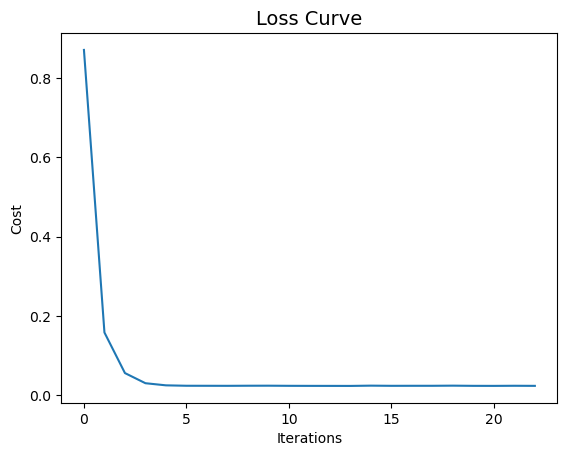

In [28]:
plt.plot(mlp_reg.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.savefig("MLP_Loss_Curve.png", dpi=300, bbox_inches='tight')
plt.show()

In [30]:
import time

num_inferences = 100
X_test_tensor = tf.convert_to_tensor(x_test)

start_time = time.time()

for _ in range(num_inferences):
    predictions = mlp_reg.predict(X_test_tensor)

end_time = time.time()

average_inference_time = (end_time - start_time) / num_inferences
print(f"Average inference time for ML model: {average_inference_time:.6f} seconds")

Average inference time for ML model: 0.001227 seconds


### SHAP

In [33]:
import shap

In [34]:
explainer = shap.Explainer(mlp_reg.predict, x_train)

In [37]:
shap_values = explainer(x_test)

ExactExplainer explainer: 751it [00:26, 18.77it/s]                         


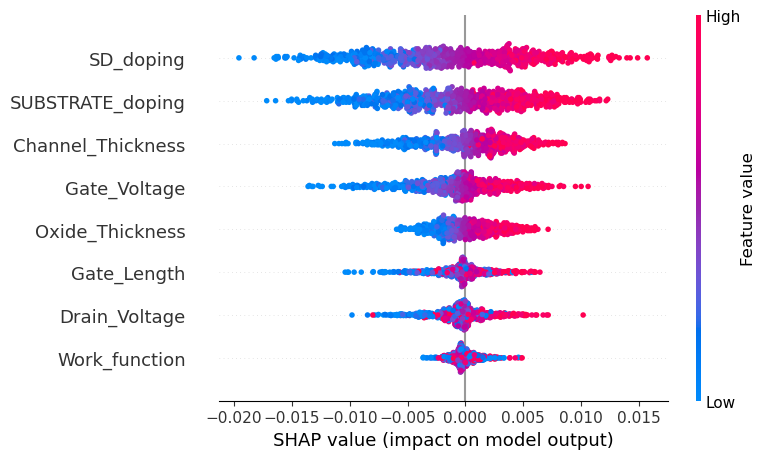

In [38]:
# Summary plot of feature importance
shap.summary_plot(shap_values, x_test, show=False)
plt.savefig("MLP_shap_summary_plot.png", dpi=300, bbox_inches='tight')

In [39]:
shap_values.shape

(750, 8)

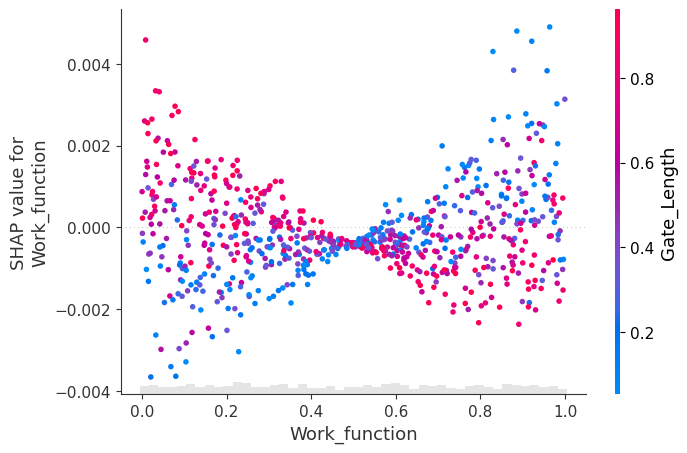

In [40]:
shap.plots.scatter(shap_values[:, "Work_function"], color=shap_values, show=False)
plt.savefig("MLP_shap_scatter_plot_1.png", dpi=300, bbox_inches='tight')

In [41]:
shap.plots.waterfall(shap_values[749], show=False)
plt.savefig("MLP_shap_waterfall_plot.png", dpi=300, bbox_inches='tight')

In [42]:
shap.plots.beeswarm(shap_values, show=False)
plt.savefig("MLP_shap_beeswarm_plot.png", dpi=300, bbox_inches='tight')

In [43]:
shap.plots.scatter(shap_values[:, "Drain_Voltage"], color=shap_values, show=False)
plt.savefig("MLP_shap_scatter_plot_2.png", dpi=300, bbox_inches='tight')

In [44]:
sample_ind = 1000
shap.partial_dependence_plot("Work_function", mlp_reg.predict, x_test, model_expected_value=True, feature_expected_value=True, ice=False,
                             shap_values=shap_values[sample_ind : sample_ind + 1, :], show=False)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

### SHAP with "csvFilex"

In [ ]:
explainer_reg = shap.Explainer(mlp_reg.predict, csvFilex)
shap_values_reg = explainer_reg(csvFilex)

# make a standard partial dependence plot
sample_ind = 1000
shap.partial_dependence_plot(
    "Work_function",
    mlp_reg.predict,
    csvFilex,
    model_expected_value=True,
    feature_expected_value=True,
    ice=False,
    shap_values=shap_values_reg[sample_ind : sample_ind + 1, :],
)

In [ ]:
dir(explainer_reg)

In [ ]:
shap.plots.scatter(shap_values_reg[:, "Work_function"])

In [ ]:
print(shap_values_reg.shape)

In [ ]:
shap.plots.waterfall(shap_values_reg[sample_ind])

In [ ]:
shap.plots.beeswarm(shap_values_reg)

In [ ]:
shap.plots.scatter(shap_values_reg[:, "Drain_Voltage"], color=shap_values_reg)

In [54]:
explainer = shap.KernelExplainer(model=mlp_reg.predict, data=x_train, link="identity")
shap_values = explainer.shap_values(x_test, nsamples=100)

Using 2975 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/750 [00:00<?, ?it/s]

### LIME

In [46]:
import lime
from lime import lime_tabular

In [48]:
lime_explainer = lime_tabular.LimeTabularExplainer(training_data=np.array(x_train), feature_names=x_train.columns, mode='regression')

In [50]:
j = 5
exp = lime_explainer.explain_instance(x_test.values[j], mlp_reg.predict, num_features=6)
print(exp)

In [52]:
explainer = lime.lime_tabular.LimeTabularExplainer(x_train.values, feature_names=x_train.columns.values.tolist(), class_names=['MEDV'], 
                                                   verbose=True, mode='regression')

In [54]:
j = 5
exp = explainer.explain_instance(x_test.values[j], mlp_reg.predict, num_features=6)

Intercept 0.15169122225153941
Prediction_local [0.15570315]
Right: 0.1554709044006512


In [56]:
exp.show_in_notebook(show_table=True)
fig = exp.as_pyplot_figure()
fig.savefig("MLP_lime_explanation_plot_1.png", dpi=300, bbox_inches='tight')

In [58]:
exp.as_list()

[('SD_doping > 0.75', 0.012384230354468269),
 ('SUBSTRATE_doping <= 0.25', -0.009894416970587381),
 ('Gate_Voltage <= 0.25', -0.006260651449372176),
 ('Channel_Thickness > 0.75', 0.006007098988635103),
 ('Oxide_Thickness > 0.76', 0.0051665949124674185),
 ('Drain_Voltage <= 0.25', -0.0033909287399291753)]

In [60]:
j = 5
exp = explainer.explain_instance(x_test.values[j], mlp_reg.predict, num_features=6)

Intercept 0.15193821309958025
Prediction_local [0.15537514]
Right: 0.1554709044006512


In [62]:
exp.show_in_notebook(show_table=True)
fig = exp.as_pyplot_figure()
fig.savefig("MLP_lime_explanation_plot_2.png", dpi=300, bbox_inches='tight')

In [64]:
exp.as_list()

[('SD_doping > 0.75', 0.012277690193749363),
 ('SUBSTRATE_doping <= 0.25', -0.00965540487980454),
 ('Gate_Voltage <= 0.25', -0.006700608101841966),
 ('Channel_Thickness > 0.75', 0.005971170136974304),
 ('Oxide_Thickness > 0.76', 0.004880196669165047),
 ('Drain_Voltage <= 0.25', -0.003336115066602168)]